## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Check for null values
application_df.isnull().sum()

EIN                       0
NAME                      0
APPLICATION_TYPE          0
AFFILIATION               0
CLASSIFICATION            0
USE_CASE                  0
ORGANIZATION              0
STATUS                    0
INCOME_AMT                0
SPECIAL_CONSIDERATIONS    0
ASK_AMT                   0
IS_SUCCESSFUL             0
dtype: int64

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'], inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_count = application_df['APPLICATION_TYPE'].value_counts()
app_count

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = []

for i, v in app_count.items():
  if v < 528:
    application_types_to_replace.append(i)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts = application_df['CLASSIFICATION'].value_counts()

for i, v in class_counts.items():
  if v > 1:
    print(i, v)

C1000 17326
C2000 6074
C1200 4837
C3000 1918
C2100 1883
C7000 777
C1700 287
C4000 194
C5000 116
C1270 114
C2700 104
C2800 95
C7100 75
C1300 58
C1280 50
C1230 36
C1400 34
C7200 32
C2300 32
C1240 30
C8000 20
C7120 18
C1500 16
C1800 15
C6000 15
C1250 14
C8200 11
C1238 10
C1278 10
C1235 9
C1237 9
C7210 7
C2400 6
C1720 6
C4100 6
C1257 5
C1600 5
C1260 3
C2710 3
C0 3
C3200 2
C1234 2
C1246 2
C1267 2
C1256 2


In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = []

for i, v in class_counts.items():
  if v < 1883:
    classifications_to_replace.append(i)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [22]:
# Look at ASK_AMT value counts
application_df['ASK_AMT'].value_counts()

ASK_AMT
5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: count, Length: 8747, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_dummies = pd.get_dummies(application_df)
application_df_dummies = application_df_dummies.astype(int)
application_df_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [13]:
# Check columns to confirm categorial variables were separated into different columns
print(application_df.columns)
print(application_df_dummies.columns)

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')
Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative'

In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df_dummies['IS_SUCCESSFUL']
X = application_df_dummies.drop(columns=['IS_SUCCESSFUL'])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_dim = len(X_train_scaled[0]) # This calculates the length of the first row of X_train_scaled, which gives the number of features. It's functionally correct, but slightly less direct because it depends on accessing the first row.
input_features = X_train_scaled.shape[1] # This accesses the second dimension (columns) of the array directly. It's more concise and easier to understand.
hnodes_layer1 = 80
hnodes_layer2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
# nn.add(tf.keras.layers.Dense(units=hnodes_layer1, input_dim=input_dim, activation="relu")) # causes warning
# nn.add(tf.keras.layers.Dense(units=hnodes_layer1, input_dim=input_features, activation="relu")) # causes warning
nn.add(tf.keras.Input(shape=(input_features,))) # Recommended approach - Define input layer separately
nn.add(tf.keras.layers.Dense(units=hnodes_layer1, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hnodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.7023 - loss: 0.5902
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.7282 - loss: 0.5545
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.7344 - loss: 0.5459
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.7363 - loss: 0.5462
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.7331 - loss: 0.5475
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.7353 - loss: 0.5447
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.7322 - loss: 0.5474
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.7341 - loss: 0.5485
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.7361 - loss: 0.5430
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.7384 - loss: 0.5415
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - accuracy: 0.7315 - loss: 0.5486
Epoch 12/100
804/80

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - 719us/step - accuracy: 0.7296 - loss: 0.5580
Loss: 0.5579503178596497, Accuracy: 0.7295626997947693


<Axes: >

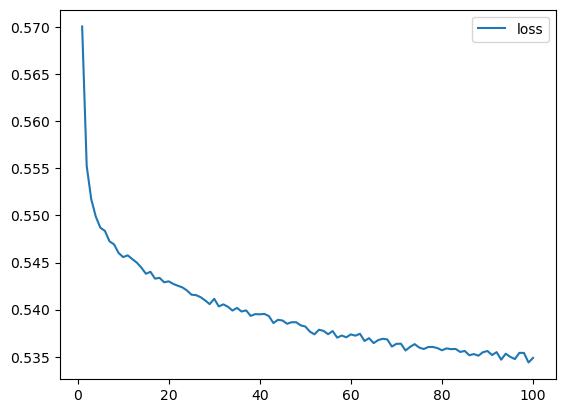

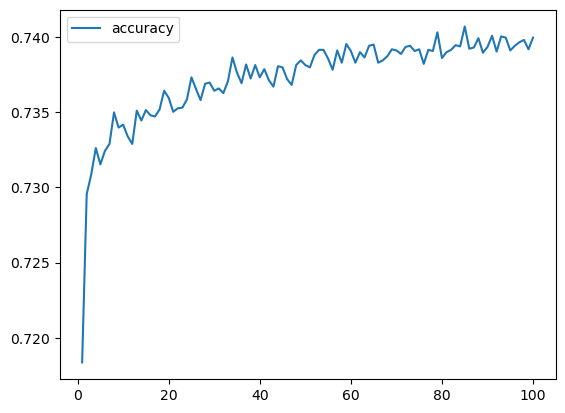

In [20]:
# Create a DataFrame containing training history of the model
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y='loss')

# Plot the accuracy
history_df.plot(y='accuracy')

In [21]:
# Export our model to HDF5 (or keras) file
nn.save("../Models_keras_files/AlphabetSoupCharity.h5")
nn.save("../Models_keras_files/AlphabetSoupCharity.keras")